In [1]:
import pandas as pd
import numpy as np
import matplotlib as matlab
import statsmodels

# Data

In [2]:
air = pd.read_csv("data/AirPassengers.csv")
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Week_num                      80 non-null     int64  
 1   Passengers                    80 non-null     int64  
 2   Promotion_Budget              80 non-null     int64  
 3   Service_Quality_Score         80 non-null     float64
 4   Holiday_week                  80 non-null     object 
 5   Delayed_Cancelled_flight_ind  80 non-null     object 
 6   Inter_metro_flight_ratio      80 non-null     float64
 7   Bad_Weather_Ind               80 non-null     object 
 8   Technical_issues_ind          80 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.8+ KB


# Correlation

In [3]:
np.corrcoef(air.Passengers,air.Promotion_Budget)

array([[1.        , 0.96585103],
       [0.96585103, 1.        ]])

# Regression

In [ ]:
import statsmodels.formula.api as sm
model = sm.ols(formula='Passengers ~ Promotion_Budget', data=air)
fitted1 = model.fit()
print(fitted1.summary())

In [ ]:
#b0 ==> Intercept  ==>
#b1 ===> coeff prmo budget ==>

In [ ]:
# y = b0 +b1*x
# Passengers = 1259.6058 + 0.0695 * (promo_budget)
# promo_budget = 500,000 ==> Predict passengers ?

# R Squared

In [ ]:
##Regression Model inter_metro_flight_ratio and passengers count
#matlab.pyplot.scatter(air.Inter_metro_flight_ratio,air.Passengers)

import statsmodels.formula.api as sm
model = sm.ols(formula='Passengers ~ Inter_metro_flight_ratio', data=air)
fitted2 = model.fit()
print(fitted2.summary())

# Multiple Regerssion Model

In [ ]:
model = sm.ols(formula='Passengers ~ Promotion_Budget+Service_Quality_Score+Inter_metro_flight_ratio', data=air)
fitted = model.fit()
print(fitted.summary())

#Linear Regression with Sk-Learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Import the Dataset: Product Sales Data/Product_sales.csv
sales=pd.read_csv("data/Product_sales.csv")

In [6]:
import sklearn as sk
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(sales[["Age"]], sales[["Bought"]])


LinearRegression()

In [ ]:
print("intercept",lr.intercept_)
print("Co-efficient",lr.coef_)

In [8]:
d1=pd.DataFrame({"Age":[4]})
predict1=lr.predict(d1)


print(predict1)

[[-0.08664394]]


c:\Users\WIN-10\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\WIN-10\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
#If Age is 105 then will that customer buy the product?
d2=pd.DataFrame({"Age":[105]})
predict2=lr.predict(d2)
print(predict2)

## Drawing Linear Regression line

In [ ]:
new_data=sales.drop(["Bought"], axis=1)
#Pass the variables to get the predicted values. Add actual values in a new column
new_data["pred_values"]= lr.predict(new_data)
new_data["Actual"]=sales["Bought"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["Age"], new_data["Actual"])
plt.plot(new_data["Age"], new_data["pred_values"], color='green')
#Add lables and title
plt.title('Predicted vs Actual Plot')
plt.xlabel('Age')
plt.ylabel('Bought')
plt.show()

In [ ]:
## craete function to vuzulize the gradients in 3d space


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(sales[["Age"]],sales["Bought"])

LogisticRegression()

In [15]:
print("Intercept", logistic.intercept_)
print("Coefficient", logistic.coef_)

Intercept [-6.90722429]
Coefficient [[0.21777169]]


In [16]:
#A 4 years old customer, will he buy the product?

predict_age1=logistic.predict(d1)
print(predict_age1)

[0]


In [17]:
#If Age is 105 then will that customer buy the product?

predict_age2=logistic.predict(d2)
print(predict_age2)

NameError: name 'd2' is not defined

## Drawing Logistic Regression line

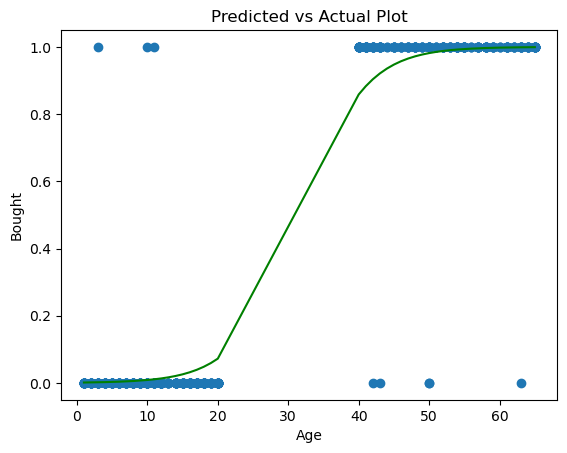

In [18]:
new_data=sales.drop(["Bought"], axis=1)
#Pass the variables to get the predicted values. Add actual values in a new column
new_data["pred_values"]= logistic.predict_proba(new_data)[:,1]
new_data["Actual"]=sales["Bought"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["Age"], new_data["Actual"])
plt.plot(new_data["Age"], new_data["pred_values"], color='green')
#Add lables and title
plt.title('Predicted vs Actual Plot')
plt.xlabel('Age')
plt.ylabel('Bought')
plt.show()

# Multiple Logistic Regression

In [9]:
Fiber=pd.read_csv("data/Fiberbits_v1.csv")

In [10]:
Fiber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   active_cust                 100000 non-null  int64
 1   income                      100000 non-null  int64
 2   months_on_network           100000 non-null  int64
 3   Num_complaints              100000 non-null  int64
 4   number_plan_changes         100000 non-null  int64
 5   relocated                   100000 non-null  int64
 6   monthly_bill                100000 non-null  int64
 7   technical_issues_per_month  100000 non-null  int64
 8   Speed_test_result           100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


In [19]:
logistic1= LogisticRegression(max_iter=200)
###fitting logistic regression for active customer on rest of the variables#######
logistic1.fit(Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']],Fiber[['active_cust']])


c:\Users\WIN-10\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\WIN-10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [20]:
print("Intercept", logistic1.intercept_)
print("Coefficients", logistic1.coef_)

Intercept [-0.24501459]
Coefficients [[ 1.72305165e-05  2.16026536e-02  7.38421699e-01 -3.06429057e-01
  -2.47502491e+00 -1.07846685e-03  8.71894229e-03 -7.98047839e-02]]


# Confusion Matrix & Accuracy

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [21]:
predict1=logistic1.predict(Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
predict1



cm1 = confusion_matrix(Fiber[['active_cust']],predict1)
print(cm1)

[[34255  7886]
 [ 5601 52258]]


In [25]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)


col sums [39856 60144]
Total 100000


In [26]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

0.86513

# Cross Validation

In [27]:
from sklearn import model_selection
train_data,test_data = model_selection.train_test_split(Fiber, test_size=0.2)

print("train Data Shape ",train_data.shape)
print("test Data Shape  ",test_data.shape)


train Data Shape  (80000, 9)
test Data Shape   (20000, 9)


In [29]:
logistic2= LogisticRegression(max_iter=200)
###fitting logistic regression for active customer on rest of the variables#######
logistic2.fit(train_data[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']],train_data[['active_cust']])


predict=logistic2.predict(train_data[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
cm_train = confusion_matrix(train_data[['active_cust']],predict)
accuracy_train=(cm_train[0,0]+cm_train[1,1])/sum(sum(cm_train))
print("accuracy on train data" , accuracy_train)


predict=logistic2.predict(test_data[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
cm_test = confusion_matrix(test_data[['active_cust']],predict)
accuracy_test=(cm_test[0,0]+cm_test[1,1])/sum(sum(cm_test))
print("accuracy on test data" , accuracy_test)


c:\Users\WIN-10\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy on train data 0.8561125
accuracy on test data 0.8537


c:\Users\WIN-10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
